# Unnormalized log transformed: breast, prostate, thyroid

The unnormalized and log transformed breast, prostate and thyroid

In [1]:
from train_RNA_ResNet import ResNet
from keras import callbacks as cb
from Calibration_Util import FileIO as io
import os
import numpy as np

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/ubuntu/anaconda3/envs/t

In [2]:
rnaNet = ResNet(layer_sizes=[6, 20])

folder = 'data/unnorm/6pc/'
# GTEX as source and TCGA as target
source_file = 'unnorm-log-6PC-GTEX-breast-prostate-thyroid.csv'
target_file = 'unnorm-log-6PC-TCGA-breast-prostate-thyroid.csv'
source_path = os.path.join(io.DeepLearningRoot(), folder + source_file)
target_path = os.path.join(io.DeepLearningRoot(), folder + target_file)

# Make GTEX target and TCGA source
# target_file = 'unnorm-log-20PC-GTEX-breast-prostate-thyroid.csv'
# source_file = 'unnorm-log-20PC-TCGA-breast-prostate-thyroid.csv'
# source_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + source_file)
# target_path = os.path.join(io.DeepLearningRoot(), 'data/unnorm/breast-prostate-thyroid/' + target_file)

rnaNet.load_data(source_path=source_path,
                target_path=target_path)

In [3]:
print("\ngtex = source shape = " + str(rnaNet.source.shape))
print("tcga = target shape = " + str(rnaNet.target.shape))


gtex = source shape = (636, 6)
tcga = target shape = (211, 6)


In [4]:
rnaNet.init_res_net()

setting scales using KNN
[12.304567691957402, 24.609135383914804, 49.218270767829608]
setting all scale weights to 1


In [5]:
callbacks=[rnaNet.lrate, cb.EarlyStopping(monitor='val_loss', patience=100, mode='auto')]
rnaNet.train(epochs=1000, callbacks=callbacks, batch_size=50)

Train on 572 samples, validate on 64 samples
Epoch 1/1000
572/572 [==============================] - 1s 1ms/step - loss: 1.1616 - val_loss: 1.8107
Epoch 2/1000
572/572 [==============================] - 0s 317us/step - loss: 1.1225 - val_loss: 1.7858
Epoch 3/1000
572/572 [==============================] - 0s 321us/step - loss: 1.0282 - val_loss: 1.8432
Epoch 4/1000
572/572 [==============================] - 0s 297us/step - loss: 0.9374 - val_loss: 1.9431
Epoch 5/1000
572/572 [==============================] - 0s 300us/step - loss: 0.8655 - val_loss: 1.7420
Epoch 6/1000
572/572 [==============================] - 0s 305us/step - loss: 0.8047 - val_loss: 1.4221
Epoch 7/1000
572/572 [==============================] - 0s 296us/step - loss: 0.7914 - val_loss: 1.4637
Epoch 8/1000
572/572 [==============================] - 0s 292us/step - loss: 0.7703 - val_loss: 1.4013
Epoch 9/1000
572/572 [==============================] - 0s 319us/step - loss: 0.7869 - val_loss: 1.4046
Epoch 10/1000
572/572

572/572 [==============================] - 0s 289us/step - loss: 0.6883 - val_loss: 1.5098
Epoch 156/1000
572/572 [==============================] - 0s 307us/step - loss: 0.6948 - val_loss: 1.2763
Epoch 157/1000
572/572 [==============================] - 0s 296us/step - loss: 0.6884 - val_loss: 1.2506
Epoch 158/1000
572/572 [==============================] - 0s 311us/step - loss: 0.6894 - val_loss: 1.2483
Epoch 159/1000
572/572 [==============================] - 0s 306us/step - loss: 0.6770 - val_loss: 1.3007
Epoch 160/1000
572/572 [==============================] - 0s 289us/step - loss: 0.6992 - val_loss: 1.2292
Epoch 161/1000
572/572 [==============================] - 0s 300us/step - loss: 0.6903 - val_loss: 1.2787
Epoch 162/1000
572/572 [==============================] - 0s 282us/step - loss: 0.6906 - val_loss: 1.3968
Epoch 163/1000
572/572 [==============================] - 0s 285us/step - loss: 0.6901 - val_loss: 1.4361
Epoch 164/1000
572/572 [==============================] - 0s 

In [6]:
from plots import scatter_plot, heatmap
rnaNet.predict()
rnaNet.pca()
%matplotlib inline

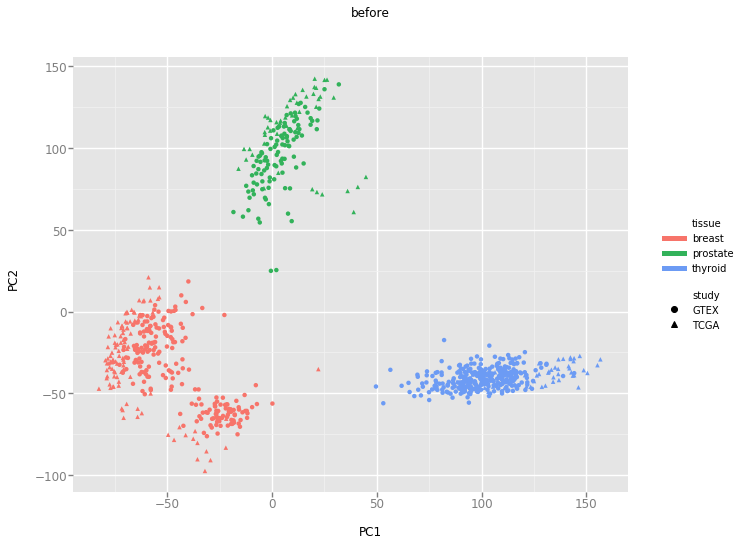

<ggplot: (8736303267606)>


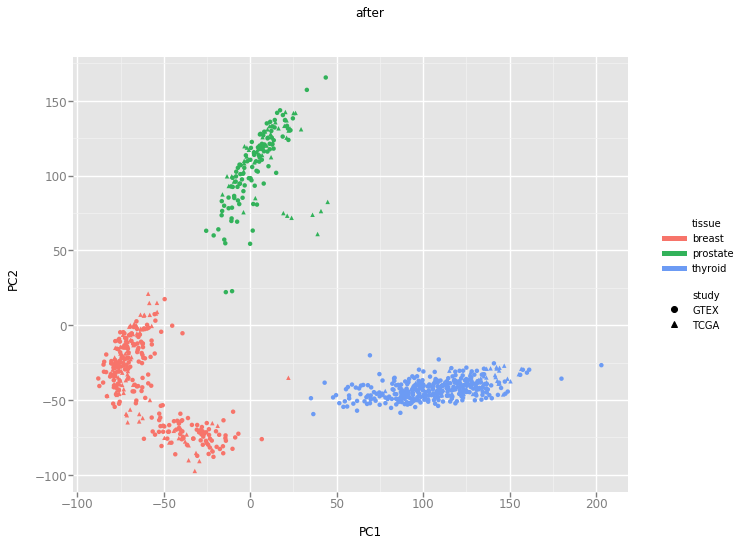

<ggplot: (-9223363300406380302)>


In [7]:
scatter_plot(rnaNet.source_pca_df, rnaNet.target_pca_df, title="before")
scatter_plot(rnaNet.calibrated_source_pca_df, rnaNet.target_pca_df, title="after")

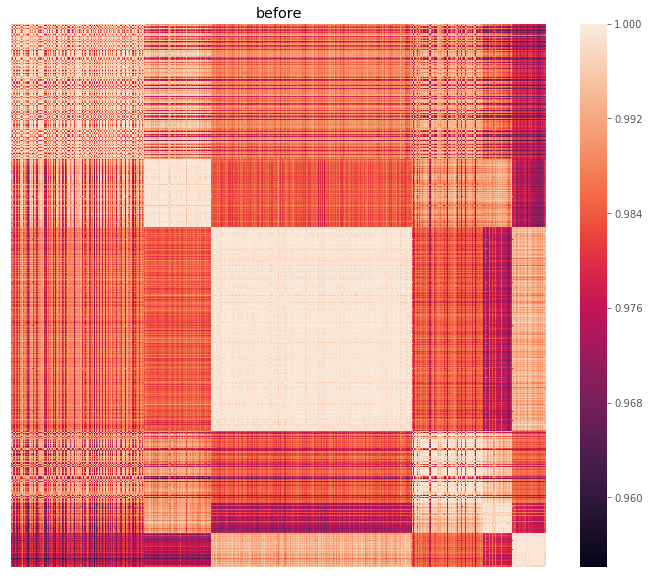

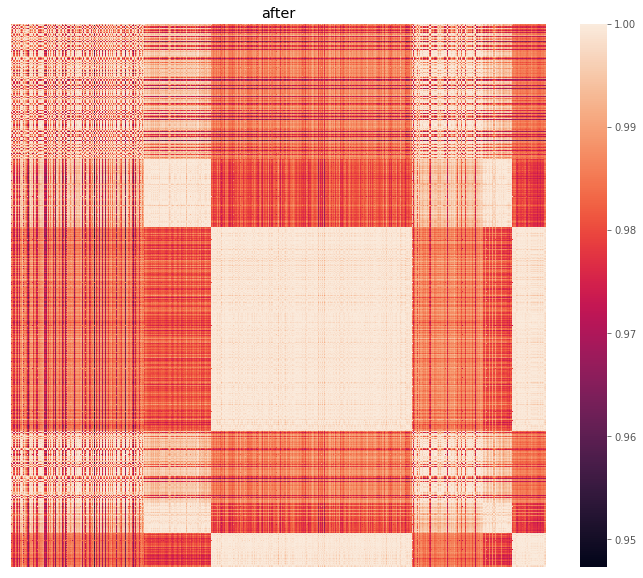

In [8]:
heatmap(rnaNet.source_df, rnaNet.target_df, title="before")
heatmap(rnaNet.calibrated_source_df, rnaNet.target_df, title="after")

In [9]:
import CostFunctions as cf
from keras import backend as K

source = rnaNet.source.astype('float32')
target = rnaNet.target.astype('float32')
calibrated_source = rnaNet.calibrated_source.astype('float32')

mmd = cf.MMD(source, target, MMDTargetSampleSize=target.shape[0], n_neighbors=10)
mmd_before = K.eval(mmd.cost(source, target))
mmd_after = K.eval(mmd.cost(calibrated_source, target))

print("MMD before: %0.10f" % mmd_before)
print("MMD after: %0.10f" % mmd_after)

setting scales using KNN
[9.2134466645143824, 18.426893329028765, 36.85378665805753]
setting all scale weights to 1
MMD before: 0.8724744320
MMD after: 0.4949973524


In [30]:
folder = 'data/unnorm/'
save_file = 'calibrated-unnorm-log-6PC-GTEX-breast-prostate-thyroid.csv'
save_path = os.path.join(io.DeepLearningRoot(), folder + save_file)

rnaNet.save_calibrated(path=save_path)